#project description
"""
Team - HU21EECE0100315 (Ekechukwu David Uzoma)
       HU21EECE0100460 (Nenavath Siri vennela)
       HU21EECE0100224 (Marepally Meghana)


 create a Python script that loads your grade data and calculates letter grades for your students.
 Exploring the data you’ll use in the project to determine which format and data you’ll need to calculate your final grades.
 Load the data into pandas DataFrames, making sure to connect the grades for the same student.
 Calculate the final grades and save them as CSV files.
 Plot the grade distribution.
"""

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("marks.csv")

In [4]:
df.info() # checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Name                                   101 non-null    object
 1   roll number                            101 non-null    object
 2   Department                             101 non-null    object
 3   Email address                          101 non-null    object
 4   Quiz: Mid1 (Real)                      101 non-null    object
 5   Quiz: Quiz (Unit-1) (Real)             101 non-null    object
 6   Quiz: Quiz-2 (Real)                    101 non-null    object
 7   Quiz: Python Mid-2 examination (Real)  101 non-null    object
 8   Quiz: QUIZ3                            101 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [5]:
# I will check if any missing value in columns
df.isna().sum()

Name                                     0
roll number                              0
Department                               0
Email address                            0
Quiz: Mid1 (Real)                        0
Quiz: Quiz (Unit-1) (Real)               0
Quiz: Quiz-2 (Real)                      0
Quiz: Python Mid-2 examination (Real)    0
Quiz: QUIZ3                              0
dtype: int64

In [6]:
df.head(5)

,Name,roll number,Department,Email address,Quiz: Mid1 (Real),Quiz: Quiz (Unit-1) (Real),Quiz: Quiz-2 (Real),Quiz: Python Mid-2 examination (Real),Quiz: QUIZ3
0,GEMBALI RAMANI,hu21csen0100525,CSE,rgembali@gitam.in,8.33,3.34,4.92,6.67,8.5
1,SURINENI SATHVIK TEJA,hu21csen0100531,CSE,ssurinen@gitam.in,9.67,5,4.25,9.67,15.83
2,POLUREDDY VEERADATTA REDDY,hu21csen0100537,CSE,vpolured@gitam.in,8.33,3.93,5,8.33,12
3,KANUPARTHI AMULYA,hu21csen0100539,CSE,akanupar@gitam.in,7,3.58,4.92,9.33,12.83
4,MIDIDHIDDI SAI POOJITHA,hu21csen0100553,CSE,smididhi@gitam.in,7.67,2.21,2.92,8.33,10.17


In [7]:
df.replace(['-'],0, inplace = True)

In [8]:
df = df.set_axis(["Name", "roll_number","Department","Email","Mid 1","Quiz 1","Quiz 2","Mid 2","Quiz 3"], axis=1)
df.head(1)

,Name,roll_number,Department,Email,Mid 1,Quiz 1,Quiz 2,Mid 2,Quiz 3
0,GEMBALI RAMANI,hu21csen0100525,CSE,rgembali@gitam.in,8.33,3.34,4.92,6.67,8.5


In [9]:
#converting the data type to int
df['Quiz 1'] = pd.to_numeric(df['Quiz 1'], errors="coerce")
df['Quiz 2'] = pd.to_numeric(df['Quiz 2'], errors="coerce")
df['Quiz 3'] = pd.to_numeric(df['Quiz 3'], errors="coerce")
#https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
df['Mid 1'] = pd.to_numeric(df['Mid 1'], errors="coerce")
df['Mid 2'] = pd.to_numeric(df['Mid 2'], errors="coerce")

In [11]:
#calculating the total quiz marks
quizzes = df.filter(regex=r"Quiz.*", axis=1)
sum_of_quizzes = quizzes.sum(axis=1)
df['Total quizzes'] = sum_of_quizzes

In [12]:
#calculating the total mid marks
mids = df.filter(regex=r"Mid.*", axis=1)
sum_of_mids = mids.sum(axis=1)
df['Total mids'] = sum_of_mids

In [13]:
df.head()

,Name,roll_number,Department,Email,Mid 1,Quiz 1,Quiz 2,Mid 2,Quiz 3,Total quizzes,Total mids
0,GEMBALI RAMANI,hu21csen0100525,CSE,rgembali@gitam.in,8.33,3.34,4.92,6.67,8.50,16.76,15.00
1,SURINENI SATHVIK TEJA,hu21csen0100531,CSE,ssurinen@gitam.in,9.67,5.00,4.25,9.67,15.83,25.08,19.34
2,POLUREDDY VEERADATTA REDDY,hu21csen0100537,CSE,vpolured@gitam.in,8.33,3.93,5.00,8.33,12.00,20.93,16.66
3,KANUPARTHI AMULYA,hu21csen0100539,CSE,akanupar@gitam.in,7.00,3.58,4.92,9.33,12.83,21.33,16.33
4,MIDIDHIDDI SAI POOJITHA,hu21csen0100553,CSE,smididhi@gitam.in,7.67,2.21,2.92,8.33,10.17,15.30,16.00


In [14]:
#calculating the total marks
df["Total internal"] = df["Total mids"]+ df["Total quizzes"]

In [15]:
# creating a new dataframe for the final output
final_data = df.filter(["Email address", "roll_number", "Name","Department", "Total mids", "Total quizzes", "Total internal"], axis=1)

In [16]:
final_data['roll_number'] = final_data['roll_number'].str.upper()

In [17]:
final_data.set_index("roll_number", inplace=True)

In [18]:
final_data.head()

,Name,Department,Total mids,Total quizzes,Total internal
roll_number,,,,,
HU21CSEN0100525,GEMBALI RAMANI,CSE,15.00,16.76,31.76
HU21CSEN0100531,SURINENI SATHVIK TEJA,CSE,19.34,25.08,44.42
HU21CSEN0100537,POLUREDDY VEERADATTA REDDY,CSE,16.66,20.93,37.59
HU21CSEN0100539,KANUPARTHI AMULYA,CSE,16.33,21.33,37.66
HU21CSEN0100553,MIDIDHIDDI SAI POOJITHA,CSE,16.00,15.30,31.30


In [19]:
#mapping the grades
grades = {
    45: "O",
    40: "A+",
    35: "A",
    30: "B+",
    25: "B",
    20: "C",
    15: "P",
    0: "F",  
}


def grade_mapping(value):
    """Map numerical grade to letter grade."""
    for key, letter in grades.items():
        if value >= key:
            return letter
# ************

letter_grades = final_data["Total internal"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)

In [20]:
final_data.head()

,Name,Department,Total mids,Total quizzes,Total internal,Final Grade
roll_number,,,,,,
HU21CSEN0100525,GEMBALI RAMANI,CSE,15.00,16.76,31.76,B+
HU21CSEN0100531,SURINENI SATHVIK TEJA,CSE,19.34,25.08,44.42,A+
HU21CSEN0100537,POLUREDDY VEERADATTA REDDY,CSE,16.66,20.93,37.59,A
HU21CSEN0100539,KANUPARTHI AMULYA,CSE,16.33,21.33,37.66,A
HU21CSEN0100553,MIDIDHIDDI SAI POOJITHA,CSE,16.00,15.30,31.30,B+


In [21]:
#get student information by name
name = input("Enter student name ---> ").upper()
final_data[final_data['Name'].str.contains(name)]
#final_data.loc[roll_no]

Enter student name ---> vennela


,Name,Department,Total mids,Total quizzes,Total internal,Final Grade
roll_number,,,,,,
HU21EECE0100460,NENAVATH SIRIVENNELA,EECE,4.0,11.66,15.66,P


In [22]:
final_data.columns

Index(['Name', 'Department', 'Total mids', 'Total quizzes', 'Total internal',
       'Final Grade'],
      dtype='object')

In [23]:
#renaming a column
old_col = input("Enter old column name ---> ").capitalize()
new_col = input("Enter new column name ---> ").capitalize()
final_data.rename(columns={old_col:new_col}, inplace= True)

Enter old column name ---> 
Enter new column name ---> 


In [24]:
# updating a student data
column_name = input('column_name ---> ').capitalize()
roll_no = input("Enter student roll number ---> ").upper()
upd = int(input("Enter the value you want to be updated ---> "))
final_data.at[roll_no,column_name]=upd

final_data["Total internal"] = final_data["Total mids"]+ final_data["Total quizzes"]
letter_grades = final_data["Total internal"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)


column_name ---> total mids
Enter student roll number ---> hu21eece0100315
Enter the value you want to be updated ---> 20


In [25]:
#deleting a student data
roll_no = input("Enter student roll number ---> ").upper()
final_data.drop(roll_no, inplace=True)

Enter student roll number ---> hu21eece0100315


In [26]:
g = final_data.groupby("Department")
#grouping CSE 
cse = g.get_group('CSE')
#grouping EECE
ece = g.get_group('EECE')

class average ---> 27.754807692307686
class max ---> 44.42


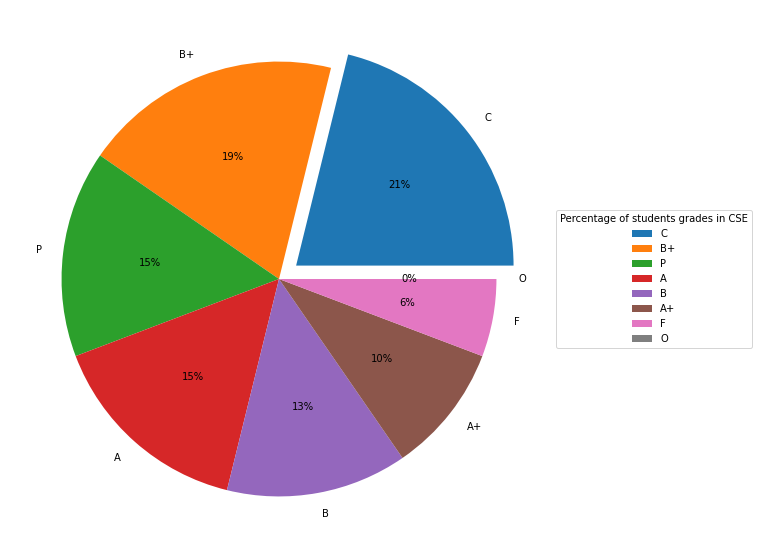

In [27]:
#performing methods on cse
d = cse['Total internal']
c_mean = d.mean()
c_max = d.max()
print(f"class average ---> {c_mean}")
print(f"class max ---> {c_max}")
#plotting the class grade on chart
grade = list(cse['Final Grade'].value_counts().keys())
count_grade = list(cse['Final Grade'].value_counts().values)
plt.figure(figsize=(20,10))

# define Seaborn color palette to use
plt.pie(count_grade, labels=grade,explode=(0.1,0,0,0,0,0,0,0), autopct='%.0f%%')
plt.legend(title = "Percentage of students grades in CSE",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

class average ---> 21.491041666666664
class max ---> 43.29


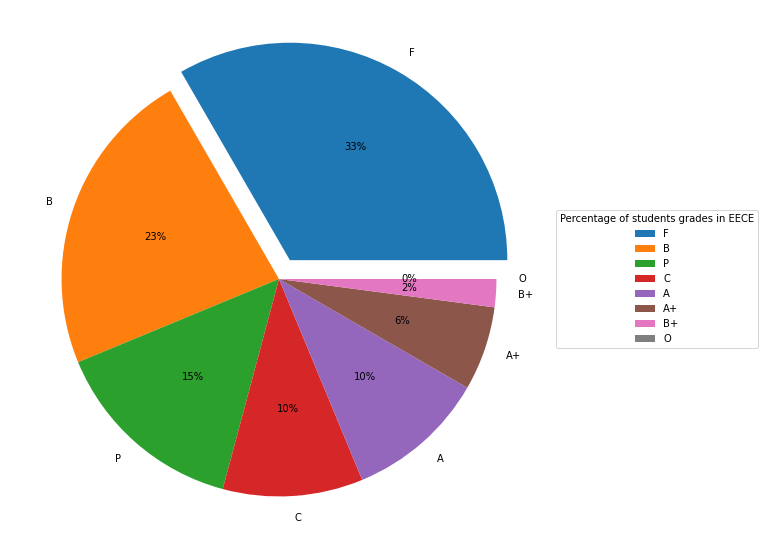

In [28]:
f = ece['Total internal']
e_mean = f.mean()
e_max = f.max()
print(f"class average ---> {e_mean}")
print(f"class max ---> {e_max}")
#plotting the class grade
grade = list(ece['Final Grade'].value_counts().keys())
count_grade = list(ece['Final Grade'].value_counts().values)
plt.figure(figsize=(20,10))

# plotting data on chart
plt.pie(count_grade, labels=grade,explode=(0.1,0,0,0,0,0,0,0), autopct='%.0f%%')
plt.legend(title = "Percentage of students grades in EECE",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

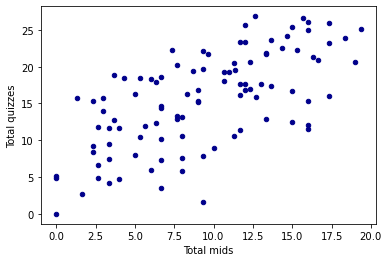

In [29]:
# relationship with mids and quizzes for all sections
final_data.plot.scatter(x='Total mids',y='Total quizzes',c='DarkBlue')
plt.show()

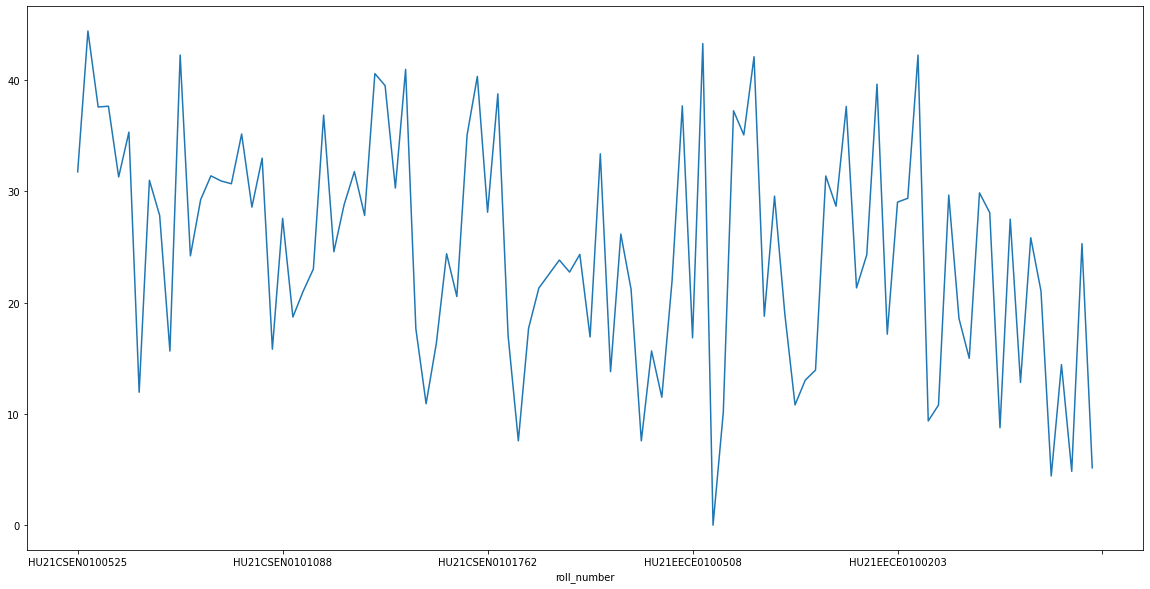

In [30]:
#showing the variation of student total marks
plt.figure(figsize=(20,10))
final_data['Total internal'].plot.line()
plt.show()

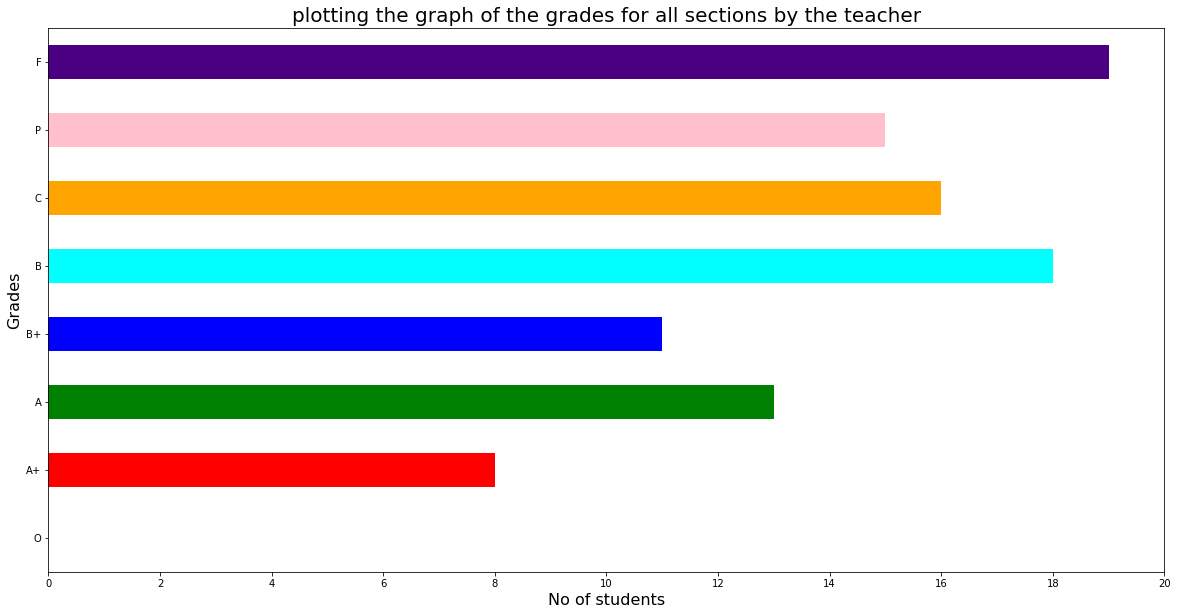

In [31]:
#plotting the graph of the grades for all sections by the teacher
plt.figure(figsize=(20,10))
grade_counts = final_data["Final Grade"].value_counts().sort_index()
grade_counts.plot.barh(color=['black', 'red', 'green', 'blue', 'cyan','orange','pink','indigo'])
plt.ylabel("Grades",fontsize=16)
plt.xlabel("No of students",fontsize=16)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title("plotting the graph of the grades for all sections by the teacher",fontsize=20)
plt.show()

In [41]:
#getting the csv file for each section
for department, table in final_data.groupby("Department"):
    section_file = f"Section {department} Grades.csv"
    num_students = table.shape[0]
    print(
        f"In Section {department} there are {num_students} students saved to "
        f"file {section_file}."
    )
    table.sort_values(by=["Name"]).to_csv(section_file)

In Section CSE there are 52 students saved to file Section CSE Grades.csv.
In Section EECE there are 48 students saved to file Section EECE Grades.csv.


In [42]:
final_data.to_excel("grade.xlsx")